In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-01-19 23:42:01.960932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [4]:
import seaborn as sns

In [ ]:
from tensorflow.keras.preprocessing import image

In [82]:
from PIL import Image

In [5]:
base_dir = "/Users/aliou/Downloads/huge_projects/aircraft_reco/final_data"

In [6]:
train_dir = base_dir + '/train'
test_dir = base_dir + '/test'

# Repertoires des images d'entrainement et de test
a_320_train_dir = train_dir + '/Airbus_320'
a_320_test_dir = test_dir + '/Airbus_320'

a_330_train_dir = train_dir + '/Airbus_330'
a_330_test_dir = test_dir + '/Airbus_330'

a_340_train_dir = train_dir + '/Airbus_340'
a_340_test_dir = test_dir + '/Airbus_340'

a_380_train_dir = train_dir + '/Airbus_380'
a_380_test_dir = test_dir + '/Airbus_380'

b_737_train_dir = train_dir + '/Boeing_737'
b_737_test_dir = test_dir + '/Boeing_737'

b_747_train_dir = train_dir + '/Boeing_747'
b_747_test_dir = test_dir + '/Boeing_747'

b_777_train_dir = train_dir + '/Boeing_777'
b_777_test_dir = test_dir + '/Boeing_777'

In [7]:
print('total training A320 images :', len(os.listdir(      a_320_train_dir ) ))
print('total training A330 images :', len(os.listdir(      a_330_train_dir ) ))
print('total training A340 images :', len(os.listdir(      a_340_train_dir ) ))
print('total training A380 images :', len(os.listdir(      a_380_train_dir ) ))
print('total training B737 images :', len(os.listdir(      b_737_train_dir ) ))
print('total training B747 images :', len(os.listdir(      b_747_train_dir ) ))
print('total training B777 images :', len(os.listdir(      b_777_train_dir ) ))
print()
print('total test A320 images :', len(os.listdir(      a_320_test_dir ) ))
print('total test A330 images :', len(os.listdir(      a_330_test_dir ) ))
print('total test A340 images :', len(os.listdir(      a_340_test_dir ) ))
print('total test A380 images :', len(os.listdir(      a_380_test_dir ) ))
print('total test B737 images :', len(os.listdir(      b_737_test_dir ) ))
print('total test B747 images :', len(os.listdir(      b_747_test_dir ) ))
print('total test B777 images :', len(os.listdir(      b_777_test_dir ) ))

total training A320 images : 101
total training A330 images : 57
total training A340 images : 101
total training A380 images : 58
total training B737 images : 91
total training B747 images : 91
total training B777 images : 60

total test A320 images : 35
total test A330 images : 11
total test A340 images : 35
total test A380 images : 19
total test B737 images : 11
total test B747 images : 11
total test B777 images : 8


## Plots

In [8]:
def plot_samples(dir, sample):

    plt.figure(figsize = (12,8))

    for i, aircraft in enumerate(sample):

        if aircraft != '.DS_Store':
            ax = plt.subplot(3,4,i+1)
            img = mpimg.imread(os.path.join(dir, aircraft))
            plt.axis("off")
            plt.imshow(img)
            ax.set_title(aircraft)

A 320

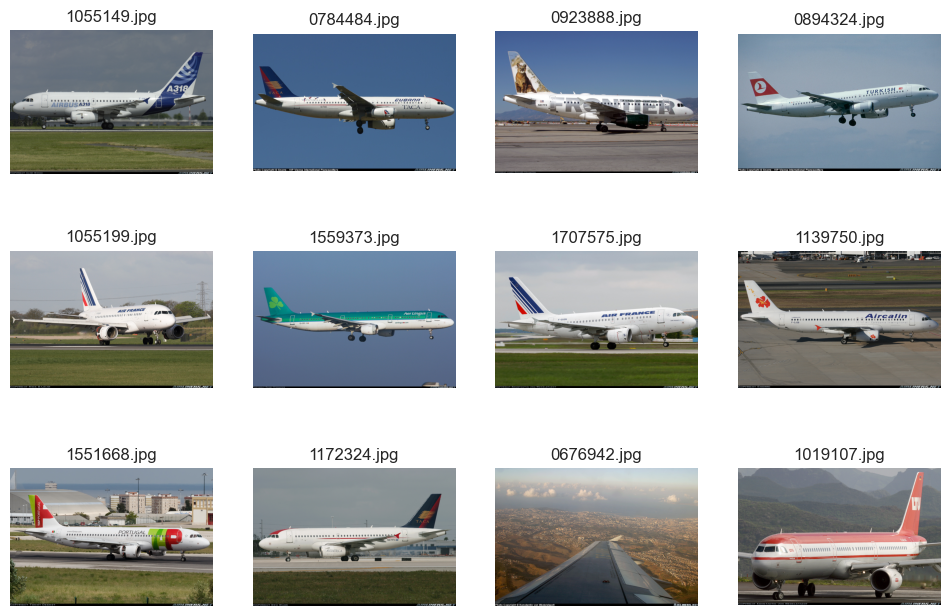

In [33]:
a_320_sample = np.random.choice(os.listdir(a_320_train_dir),size = 12)
plot_samples(a_320_train_dir, a_320_sample)

A 330

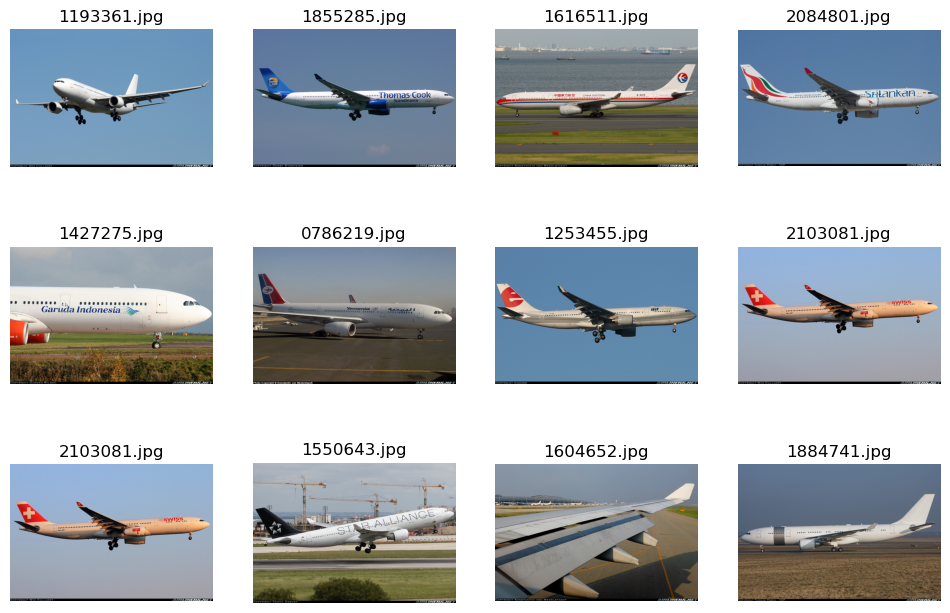

In [10]:
a_330_sample = np.random.choice(os.listdir(a_330_train_dir),size = 12)
plot_samples(a_330_train_dir, a_330_sample)

A 340

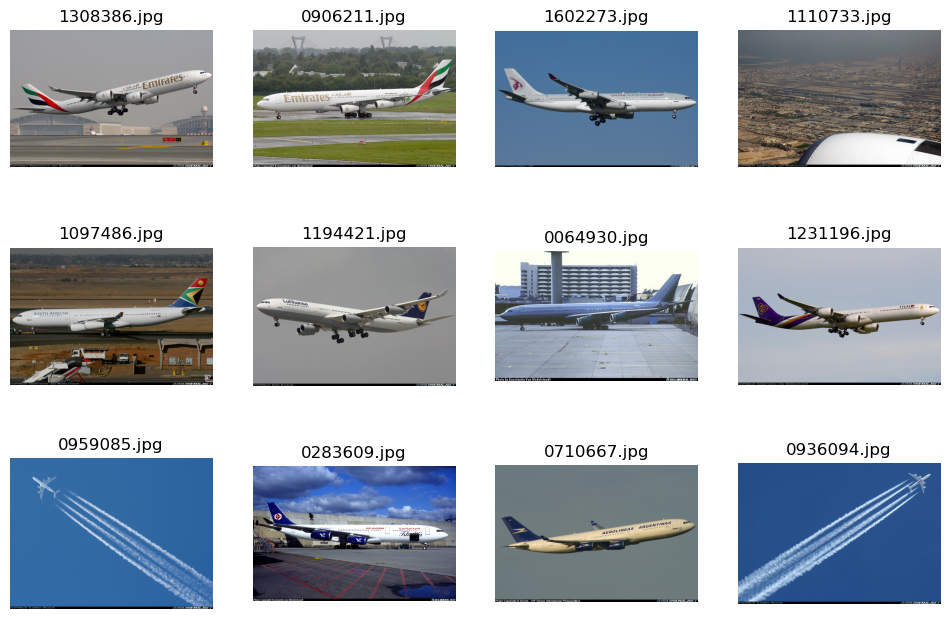

In [11]:
a_340_sample = np.random.choice(os.listdir(a_340_train_dir),size = 12)
plot_samples(a_340_train_dir, a_340_sample)

A 380

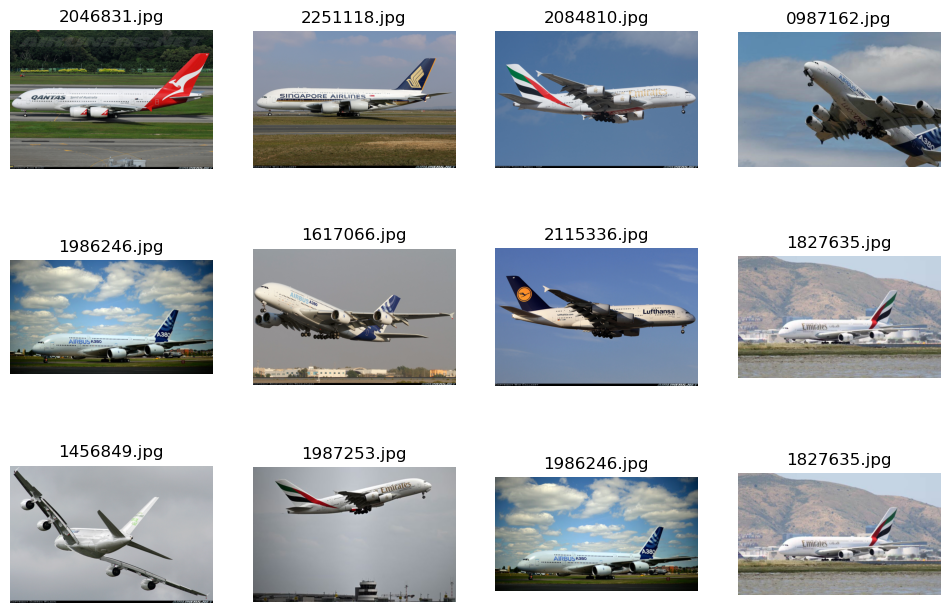

In [12]:
a_380_sample = np.random.choice(os.listdir(a_380_train_dir),size = 12)
plot_samples(a_380_train_dir, a_380_sample)

B 737

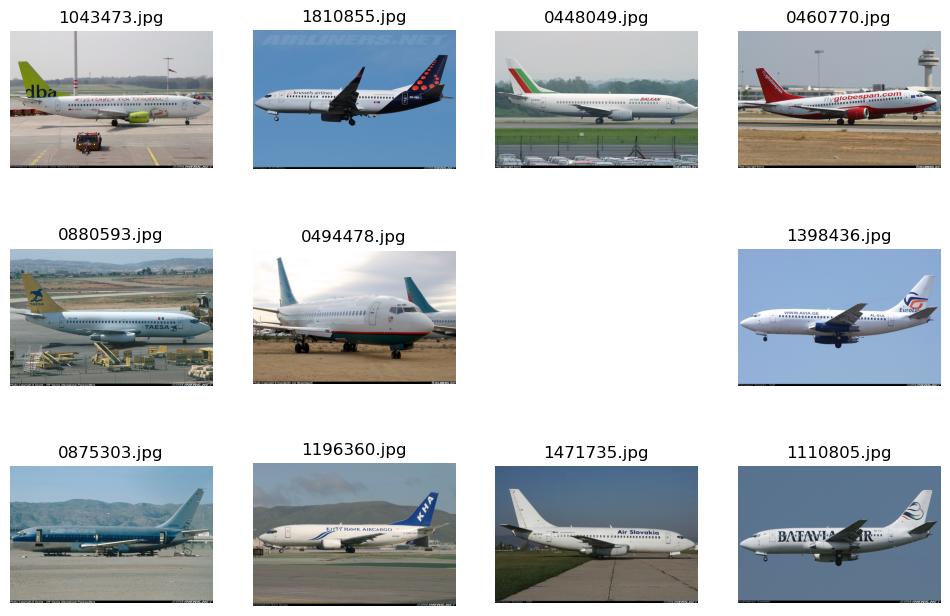

In [13]:
b_737_sample = np.random.choice(os.listdir(b_737_train_dir),size = 12)
plot_samples(b_737_train_dir, b_737_sample)

B 747

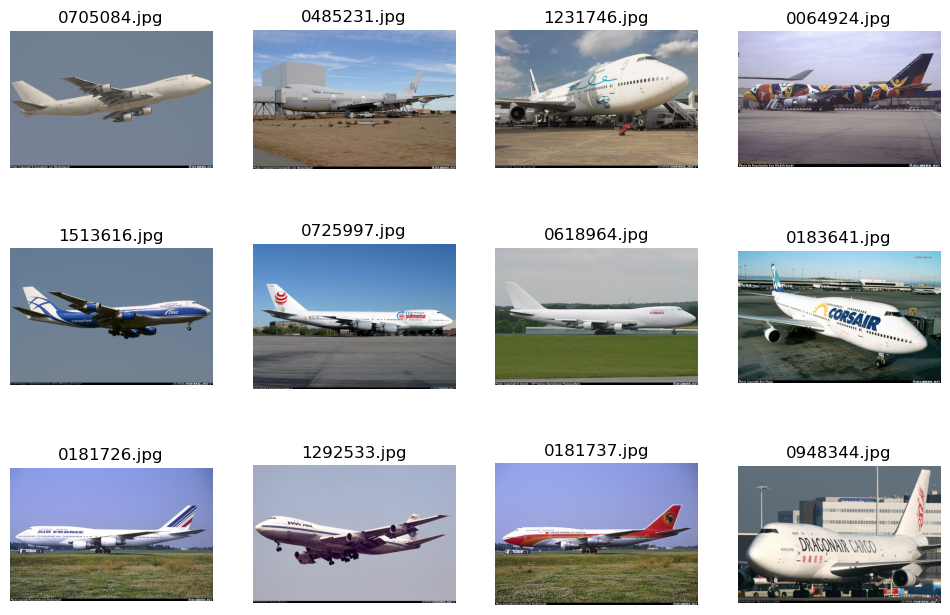

In [14]:
b_747_sample = np.random.choice(os.listdir(b_747_train_dir),size = 12)
plot_samples(b_747_train_dir, b_747_sample)

B 777

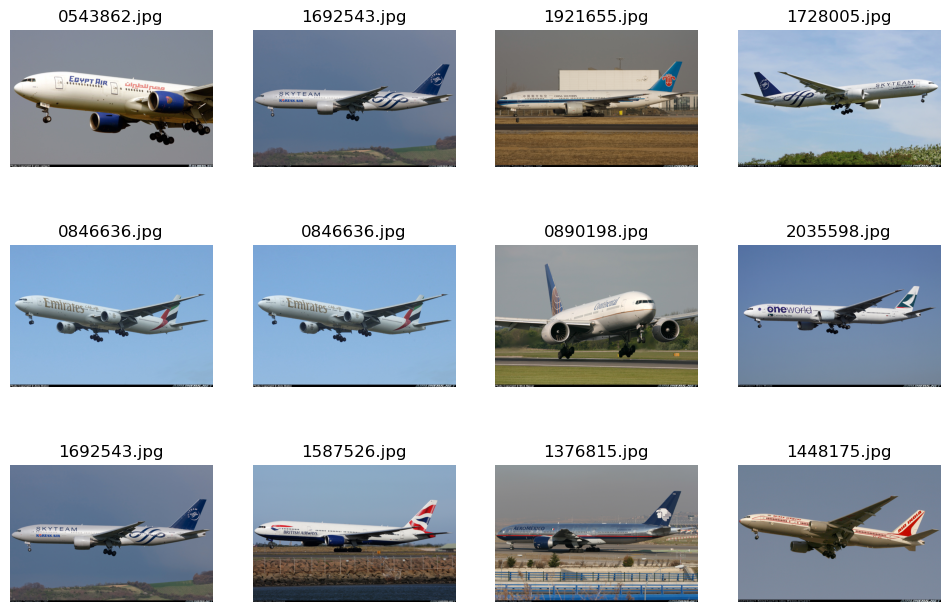

In [15]:
b_777_sample = np.random.choice(os.listdir(b_777_train_dir),size = 12)
plot_samples(b_777_train_dir, b_777_sample)

## Data augmentation to reduce overfitting

In [59]:

train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'sparse',
    color_mode = 'grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'sparse',
    color_mode = 'grayscale'
)

Found 552 images belonging to 7 classes.
Found 123 images belonging to 7 classes.


In [110]:
test_generator.class_indices

{'Airbus_320': 0,
 'Airbus_330': 1,
 'Airbus_340': 2,
 'Airbus_380': 3,
 'Boeing_737': 4,
 'Boeing_747': 5,
 'Boeing_777': 6}

## Making the sequential model

In [60]:
input_shape = (150, 150, 1)
num_classes = 7  

model = Sequential([

    Conv2D(16, (3, 3), input_shape=input_shape, activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dropout(0.4),

    Dense(512, activation='relu'),
    BatchNormalization(),
    
    Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

In [61]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_12 (Ba  (None, 74, 74, 16)        64        
 tchNormalization)                                               
                                                                 
 conv2d_32 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                      

## Compile the model

In [62]:
# Compile the model
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics = ['accuracy'])

## Early stopping callback()

In [67]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

## Learning rate scheduler callback()

In [68]:
def learning_rate_scheduler(epochs):

    if epochs < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epochs))

In [69]:
learning_rate_schedule = LearningRateScheduler(learning_rate_scheduler)

## Fit the model

If ! train/test split already; Add validation_split=0.33 (For cross entropy validation: Alternatively choose samples between test and train split)

In [70]:
history = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 30,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks = [early_stopping, learning_rate_schedule]
)

Epoch 1/30
28/28 [==============================] - 19s 687ms/step - loss: 2.3233 - accuracy: 0.2355 - val_loss: 3.2960 - val_accuracy: 0.1463 - lr: 0.0010
Epoch 2/30
28/28 [==============================] - 18s 658ms/step - loss: 2.0624 - accuracy: 0.2518 - val_loss: 3.2774 - val_accuracy: 0.2764 - lr: 0.0010
Epoch 3/30
28/28 [==============================] - 19s 666ms/step - loss: 2.1707 - accuracy: 0.2391 - val_loss: 2.2799 - val_accuracy: 0.2764 - lr: 0.0010
Epoch 4/30
28/28 [==============================] - 18s 661ms/step - loss: 2.0865 - accuracy: 0.2192 - val_loss: 3.3319 - val_accuracy: 0.1463 - lr: 0.0010
Epoch 5/30
28/28 [==============================] - 19s 663ms/step - loss: 2.0550 - accuracy: 0.2156 - val_loss: 2.6611 - val_accuracy: 0.2764 - lr: 0.0010
Epoch 6/30
28/28 [==============================] - 19s 663ms/step - loss: 1.9728 - accuracy: 0.2283 - val_loss: 2.8213 - val_accuracy: 0.1463 - lr: 0.0010


In [71]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [72]:
acc = history.history['accuracy'][-1]

loss = history.history['loss'][-1]

epochs = len(history.history['accuracy'])
val_acc = history.history['val_accuracy'][-1]

print(f"accuracy: {acc}\nloss: {loss}")

accuracy: 0.22826087474822998
loss: 1.9727964401245117


## Check for overfitting

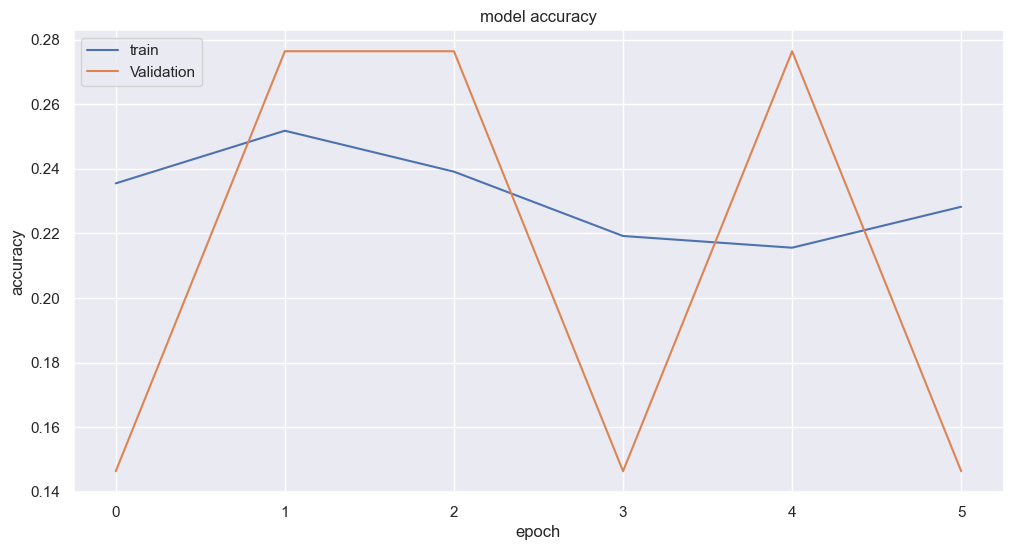

In [73]:
sns.set()
plt.figure(figsize = (12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

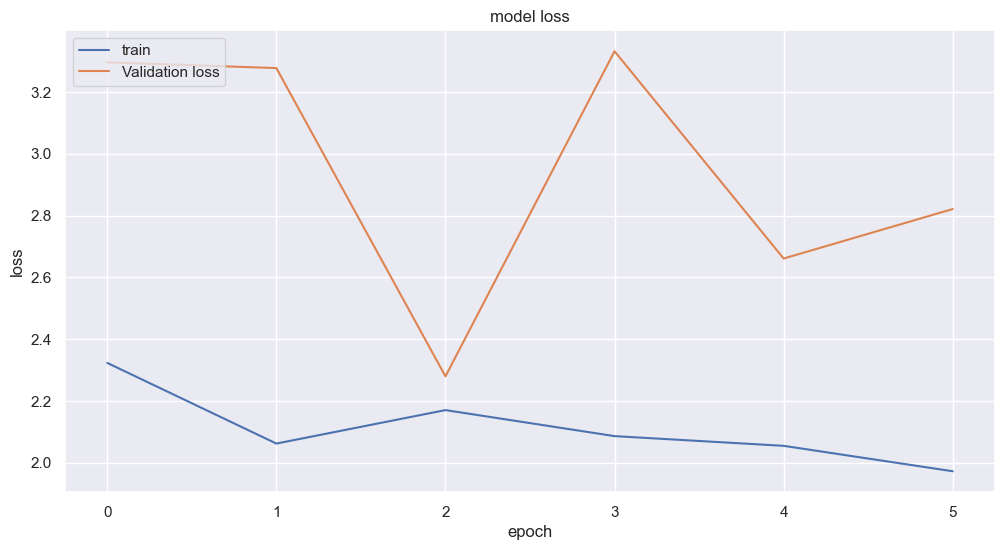

In [74]:
sns.set()
plt.figure(figsize = (12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation loss'], loc='upper left')
plt.show()

## Prédiction

In [95]:
def rgb_to_grayscale(path):

    rgb_image = Image.open(path)

    grayscale_image = rgb_image.convert('L')
    grayscale_image = np.array(grayscale_image)

    # Resize the NumPy array
    np_image = np.array(Image.fromarray(grayscale_image).resize((150, 150)))

    # Normalize the image
    np_image_nomalized = np_image / 255.0
    
    return np_image_nomalized

In [127]:

T=[]
for i in range(1, 8):
  img = rgb_to_grayscale('/Users/aliou/Downloads/huge_projects/aircraft_reco/tests/'+str(i)+'.jpg')
  T.append(img)

In [137]:
for im in range(len(T)):
    print(f"Image {im}, predicted: {np.argmax(model.predict(np.expand_dims(T[im], axis = 0)), axis = 1)}.")

1/1 [==============================] - 0s 42ms/step
Image 0, predicted: [2].
1/1 [==============================] - 0s 37ms/step
Image 1, predicted: [2].
1/1 [==============================] - 0s 30ms/step
Image 2, predicted: [2].
1/1 [==============================] - 0s 30ms/step
Image 3, predicted: [2].
1/1 [==============================] - 0s 34ms/step
Image 4, predicted: [2].
1/1 [==============================] - 0s 33ms/step
Image 5, predicted: [2].
1/1 [==============================] - 0s 37ms/step
Image 6, predicted: [2].


In [112]:
train_generator.class_indices

{'Airbus_320': 0,
 'Airbus_330': 1,
 'Airbus_340': 2,
 'Airbus_380': 3,
 'Boeing_737': 4,
 'Boeing_747': 5,
 'Boeing_777': 6}

In [96]:
a380 = rgb_to_grayscale('/Users/aliou/Downloads/huge_projects/aircraft_reco/tests/1.jpg')

In [129]:
result = model.predict(np.expand_dims(a380, axis=0))
print(np.argmax(result, axis=1))

1/1 [==============================] - 0s 41ms/step
[2]


[2]


In [1]:
plt.figure(figsize = (12,8))

for i in range(1, 7):

    ax = plt.subplot(3,3,i+1)
    x = image.img_to_array(T[i])
    x = x[np.newaxis]
    plt.axis("off")
    plt.imshow(T[i])
    result = model.predict(x)
    if result == 0 :
      ax.set_title("the model says : Cat")
    else :
      ax.set_title("the model says : Dog")

NameError: name 'plt' is not defined